In [230]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping


In [231]:
df=sns.load_dataset('tips')

In [232]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [233]:
df.shape

(244, 7)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [235]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [236]:
df.duplicated().sum()

1

In [237]:
df.drop_duplicates(inplace=True)

In [238]:
df.shape

(243, 7)

In [239]:
df.total_bill.unique()

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
       12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
       16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
       18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
       25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 13.81, 11.02, 17.59,
       20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07, 26.86, 25.28,
       14.73, 10.51, 27.2 , 22.76, 17.29, 19.44, 16.66, 10.07, 32.68,
       15.98, 34.83, 13.03, 18.28, 24.71, 21.16, 28.97, 22.49,  5.75,
       16.32, 22.75, 40.17, 27.28, 12.03, 12.46, 11.35, 15.38, 44.3 ,
       22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.  ,  7.25,
       38.07, 23.95, 25.71, 17.31, 29.93, 10.65, 12.43, 24.08, 11.69,
       13.42, 14.26, 15.95, 12.48, 29.8 ,  8.52, 14.52, 11.38, 22.82,
       19.08, 20.27,

In [240]:
df.tip.unique()

array([ 1.01,  1.66,  3.5 ,  3.31,  3.61,  4.71,  2.  ,  3.12,  1.96,
        3.23,  1.71,  5.  ,  1.57,  3.  ,  3.02,  3.92,  1.67,  3.71,
        3.35,  4.08,  2.75,  2.23,  7.58,  3.18,  2.34,  4.3 ,  1.45,
        2.5 ,  2.45,  3.27,  3.6 ,  3.07,  2.31,  2.24,  2.54,  3.06,
        1.32,  5.6 ,  6.  ,  2.05,  2.6 ,  5.2 ,  1.56,  4.34,  3.51,
        1.5 ,  1.76,  6.73,  3.21,  1.98,  3.76,  2.64,  3.15,  2.47,
        1.  ,  2.01,  2.09,  1.97,  3.14,  2.2 ,  1.25,  3.08,  4.  ,
        2.71,  3.4 ,  1.83,  2.03,  5.17,  5.85,  3.25,  4.73,  3.48,
        1.64,  4.06,  4.29,  2.55,  5.07,  1.8 ,  2.92,  1.68,  2.52,
        4.2 ,  1.48,  2.18,  2.83,  6.7 ,  2.3 ,  1.36,  1.63,  1.73,
        2.74,  5.14,  3.75,  2.61,  4.5 ,  1.61, 10.  ,  3.16,  5.15,
        3.11,  3.55,  3.68,  5.65,  6.5 ,  4.19,  2.56,  2.02,  1.44,
        3.41,  5.16,  9.  ,  1.1 ,  3.09,  1.92,  1.58,  2.72,  2.88,
        3.39,  1.47,  1.17,  4.67,  5.92,  1.75])

In [241]:
df.sex.unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [242]:
df.smoker.unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [243]:
df.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [244]:
df.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [245]:
le=LabelEncoder()

In [246]:
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['day']=le.fit_transform(df['day'])
df['time']=le.fit_transform(df['time'])

In [247]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [248]:
x=df.drop('total_bill',axis=1)

In [249]:
y=df.total_bill

In [250]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [251]:
scalar=StandardScaler()

In [252]:
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.fit_transform(x_test)

In [253]:
x_test_scaled.shape

(49, 6)

In [254]:
model=tf.keras.Sequential([
    
    #input layer
    tf.keras.layers.InputLayer(input_shape=x_train_scaled.shape[1:]),
    
    #hidden layers
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    
    #outputlayer
    tf.keras.layers.Dense(1)
])

In [255]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [256]:
early_stopping=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [257]:
history=model.fit(x_train_scaled,y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
5/5 [==============================] - 1s 36ms/step - loss: 499.0438 - val_loss: 461.9488
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 494.3594 - val_loss: 458.0104
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 490.1880 - val_loss: 454.5152
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 486.4185 - val_loss: 451.3183
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 482.7890 - val_loss: 448.1791
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 479.2578 - val_loss: 444.9639
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 475.4753 - val_loss: 441.3712
Epoch 8/100
5/5 [==============================] - 0s 12ms/step - loss: 471.4305 - val_loss: 437.4058
Epoch 9/100
5/5 [==============================] - 0s 10ms/step - loss: 466.7265 - val_loss: 432.9158
Epoch 10/100
5/5 [==============================] - 0s 12ms/step - loss: 461.3328 -

5/5 [==============================] - 0s 12ms/step - loss: 29.9742 - val_loss: 44.2428
Epoch 82/100
5/5 [==============================] - 0s 10ms/step - loss: 29.9055 - val_loss: 44.2601
Epoch 83/100
5/5 [==============================] - 0s 11ms/step - loss: 29.8242 - val_loss: 44.1932
Epoch 84/100
5/5 [==============================] - 0s 10ms/step - loss: 29.7762 - val_loss: 44.1277
Epoch 85/100
5/5 [==============================] - 0s 12ms/step - loss: 29.7023 - val_loss: 44.0753
Epoch 86/100
5/5 [==============================] - 0s 10ms/step - loss: 29.6360 - val_loss: 44.0703
Epoch 87/100
5/5 [==============================] - 0s 10ms/step - loss: 29.6971 - val_loss: 44.0088
Epoch 88/100
5/5 [==============================] - 0s 10ms/step - loss: 29.5394 - val_loss: 43.9978
Epoch 89/100
5/5 [==============================] - 0s 12ms/step - loss: 29.4762 - val_loss: 44.0122
Epoch 90/100
5/5 [==============================] - 0s 10ms/step - loss: 29.4412 - val_loss: 44.0380
Epo

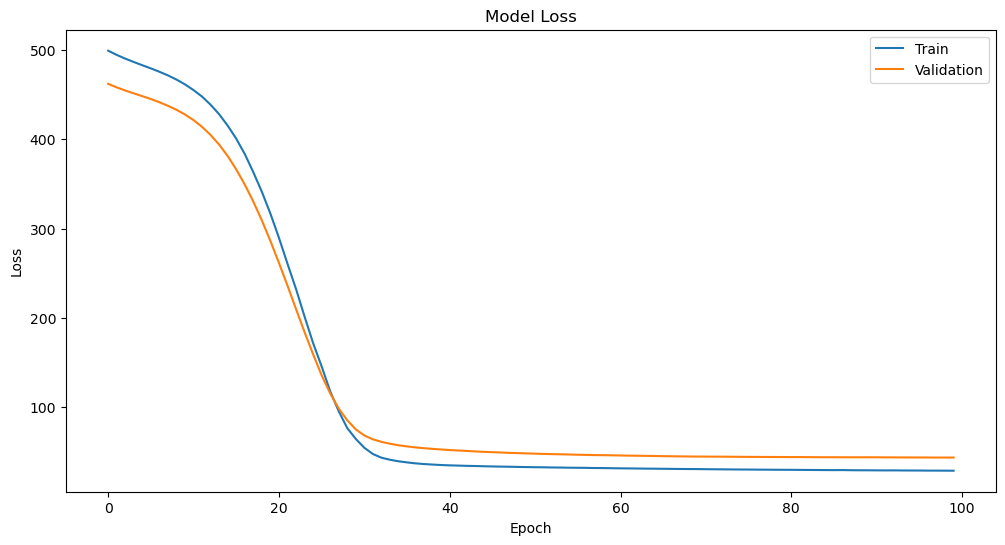

In [259]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

In [260]:
loss=model.evaluate(x_test_scaled,y_test)
print(f"Test loss:{loss}")

2/2 [==============================] - 0s 4ms/step - loss: 45.9193
Test loss:45.91926574707031
